# Implementation of Martin's Classen crack orientation concept

In [1]:
import sympy as sp
import numpy as np

<img src="martin concept.png" width="700"/> 

## Symbol representation

In [2]:
sigma_x0, sigma_z0, tau_0 = sp.symbols('sigma_x0, sigma_z0, tau_0')
beta = sp.Symbol(r'\beta')
beta

\beta

## Tranformation of global stresses into cosine components

\begin{align}
\sigma_{x0} = 
\left[
\begin{array}{cc}
\sigma_{x0} \cos \beta \\
\sigma_{x0} \sin \beta \\
\end{array}
\right]
\end{align}

In [3]:
sigma_x0_components = sp.Matrix([sigma_x0 * sp.cos(beta), sigma_x0 * sp.sin(beta)])
sigma_x0_components

Matrix([
[sigma_x0*cos(\beta)],
[sigma_x0*sin(\beta)]])

\begin{align}
\sigma_{z0} = 
\left[
\begin{array}{cc}
\sigma_{z0} \cos \beta \\
\sigma_{z0} \sin \beta \\
\end{array}
\right]
\end{align}

In [4]:
sigma_z0_components = sp.Matrix([sigma_z0 * sp.cos(beta), sigma_z0 * sp.sin(beta)])
sigma_z0_components

Matrix([
[sigma_z0*cos(\beta)],
[sigma_z0*sin(\beta)]])

\begin{align}
\tau_{0} = 
\left[
\begin{array}{cc}
\tau_{0} \cos \beta \\
\tau_{0} \sin \beta \\
\end{array}
\right]
\end{align}

In [5]:
tau_0_components = sp.Matrix([tau_0 * sp.cos(beta), tau_0 * sp.sin(beta)])
tau_0_components

Matrix([
[tau_0*cos(\beta)],
[tau_0*sin(\beta)]])

## Principle Stress tensor

\begin{align}
\sigma_{ij} = 
\left[
\begin{array}{cc}
\sigma_{1} & 0 \\
0 & \sigma_{2}
\end{array}
\right]
\end{align}

In [6]:
sigma_1, sigma_2 = sp.symbols('sigma_1, sigma_2')
sigma_ps = sp.Matrix([[sigma_1, 0], [0, sigma_2]])
sigma_ps

Matrix([
[sigma_1,       0],
[      0, sigma_2]])

## Triangle 1

<img src="triangle 1.png" width="400"/> 

## Principle Stress Tensor equivalence from triangle 1

In [7]:
sigma_ps_equiv_1 = sp.simplify(sp.Matrix([[(sigma_z0_components[0] + tau_0_components[1])/sp.cos(beta), 0], 
                            [0, (sigma_z0_components[1] - tau_0_components[0])//sp.sin(beta)]]))
sigma_ps_equiv_1

Matrix([
[sigma_z0 + tau_0*tan(\beta),                                  0],
[                          0, floor(sigma_z0 - tau_0/tan(\beta))]])

In [8]:
sig_ps_1 = sp.Eq(sigma_ps, sigma_ps_equiv_1)
sig_ps_1

Eq(Matrix([
[sigma_1,       0],
[      0, sigma_2]]), Matrix([
[sigma_z0 + tau_0*tan(\beta),                                  0],
[                          0, floor(sigma_z0 - tau_0/tan(\beta))]]))

In [9]:
beta_solved = sp.solve(sp.Eq(sigma_ps[0,0], sigma_ps_equiv_1[0,0]), beta)[0]
beta_solved

atan((sigma_1 - sigma_z0)/tau_0)

In [10]:
f_ct = sp.Symbol('f_ct')
beta_subs = beta_solved.subs(sigma_1, f_ct)
beta_subs

atan((f_ct - sigma_z0)/tau_0)

In [11]:
get_beta = sp.lambdify((sigma_1, sigma_z0, tau_0), beta_solved)
get_beta

<function _lambdifygenerated(sigma_1, sigma_z0, tau_0)>

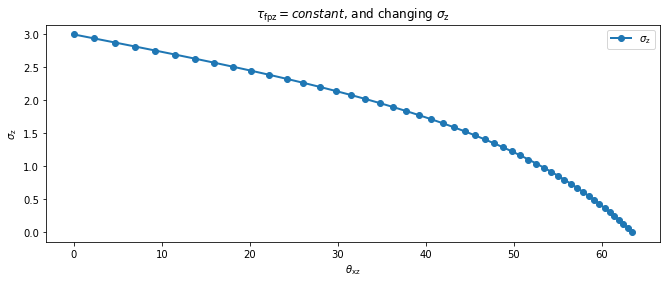

In [12]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

f_ct_val = 3
eta = 0.5
tau_xx = eta * f_ct_val
sigma_z = np.linspace(0, 3, 50)
theta_xz = get_beta(f_ct_val, sigma_z, tau_xx)

ax1.plot(theta_xz * 180/ np.pi,  sigma_z, 'o-', lw= 2, label = r'$\sigma_{\mathrm{z}}}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\sigma_{\mathrm{z}}$');
ax1.set_title(r'$\tau_{\mathrm{fpz}} = constant$, and changing $\sigma_{\mathrm{z}}$')
ax1.legend()

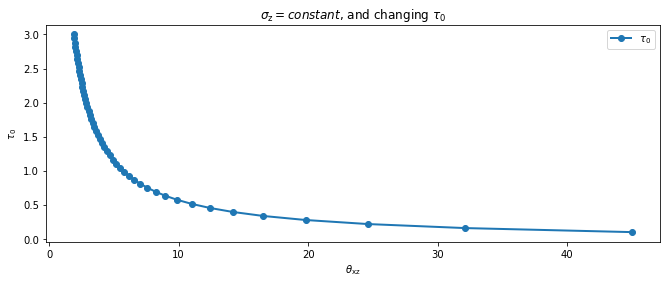

In [13]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

f_ct_val = 3
sigma_z = 2.9
tau_xx = np.linspace(0.1, 3, 50)
theta_xz = get_beta(f_ct_val, sigma_z, tau_xx)

ax1.plot(theta_xz * 180/ np.pi,  tau_xx, 'o-', lw= 2, label = r'$\tau_{\mathrm{0}}}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\tau_{\mathrm{0}}$');
ax1.set_title(r'$\sigma_{\mathrm{z}} = constant$, and changing $\tau_{\mathrm{0}}$')
ax1.legend()

In [18]:
f_ct_val = 3
tau_xx_num = 10
tau_xx = np.linspace(0.15,1.5, tau_xx_num)
#eta = 0.2
#tau_xx = eta * f_ct_val
sig_z_num = 10
sigma_z = np.linspace(0, 2.9, sig_z_num)
beta = np.zeros([tau_xx_num, sig_z_num])
for j in  range(len(sigma_z)):
    #print('sigma_z =', sigma_z[j])
    for i in range(len(tau_xx)):
        #print('tau_fpz =', tau_fpz[i])
        beta_xz = get_beta(f_ct_val, sigma_z[j], tau_xx[i])
        beta[j, i] = beta_xz
print(beta * 180/ np.pi) 

[[87.13759477 84.28940686 81.46923439 78.69006753 75.96375653 73.30075577
  70.70995378 68.19859051 65.77225468 63.43494882]
 [86.79383608 83.60762632 80.46058967 77.37054105 74.35334448 71.42252466
  68.58905069 65.86128465 63.24507121 60.74393478]
 [86.35636772 82.74196989 79.18465761 75.70967492 72.33872115 69.08936965
  65.97485162 63.00416161 60.18240836 57.51132349]
 [85.78090465 81.60707481 77.5209282  73.55962048 69.75337992 66.12471915
  62.68846625 59.45242825 56.41844708 53.58362148]
 [84.99012494 80.05570574 75.26559423 70.67681568 66.3315991  62.25679553
  58.46520809 54.9580706  51.72793593 48.76143748]
 [83.83594756 77.8113668  72.04767569 66.63565552 61.63095371 57.05676253
  52.91071946 49.17298448 45.81347567 42.79740184]
 [81.99527114 74.29136217 67.12633481 60.64224646 54.88798882 49.84400038
  45.45113855 41.63353934 38.31309067 35.41705528]
 [78.60786417 68.05130092 58.84797762 51.1322225  44.78700552 39.59620864
  35.33643905 31.8142387  28.87411397 26.39503453]


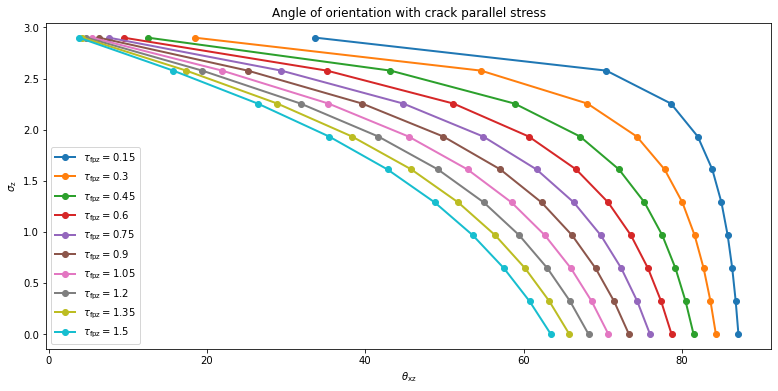

In [19]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(13,6))
ax1.plot(beta[:,0] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.15}$')
ax1.plot(beta[:,1] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.3}$')
ax1.plot(beta[:,2] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.45}$')
ax1.plot(beta[:,3] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.6}$')
ax1.plot(beta[:,4] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.75}$')
ax1.plot(beta[:,5] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.9}$')
ax1.plot(beta[:,6] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.05}$')
ax1.plot(beta[:,7] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.2}$')
ax1.plot(beta[:,8] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.35}$')
ax1.plot(beta[:,9] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.5}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\sigma_{\mathrm{z}}$');
ax1.set_title(r'Angle of orientation with crack parallel stress')
ax1.legend()

## Triangle 2

<img src="triangle 2.png" width="300"/> 

## Principle Stress Tensor equivalence from triangle 2

In [ ]:
sigma_ps_equiv_2 = sp.simplify(sp.Matrix([[(sigma_x0_components[1] + tau_0_components[0])/sp.sin(beta), 0], 
                            [0, (sigma_x0_components[0] - tau_0_components[1])//sp.cos(beta)]]))
sigma_ps_equiv_2

In [ ]:
sig_ps_2 = sp.Eq(sigma_ps, sigma_ps_equiv_2)
sig_ps_2

## $\sigma_{x0}$, $\tau_{0}$ calculation based on principal stress criteria

In [ ]:
tau_0_solve = sp.solve(sp.Eq(sigma_ps[0,0], sigma_ps_equiv_1[0,0]), tau_0)[0]
tau_0_solve

In [ ]:
sigma_x0_solve = sp.solve(sp.Eq(sigma_ps[0,0], sigma_ps_equiv_2[0,0]).subs(tau_0, tau_0_solve), sigma_x0)[0]
sigma_x0_solve

### Global stress tensor
\begin{align}
\sigma_{ij} = 
\left[
\begin{array}{cc}
\sigma_{x0} & \tau_0 \\
\tau_0 & \sigma_{z0}
\end{array}
\right]
\end{align}

In [ ]:
sigma_ij = sp.simplify(sp.Matrix([[sigma_x0_solve, tau_0_solve], 
                            [tau_0_solve, sigma_z0]]))
sigma_ij

### Ratio of principal stresses
\begin{equation}
\alpha = \frac{\sigma_1}{\sigma_2}
\end{equation}

In [ ]:
alpha = sigma_ps_equiv_1[0,0] / sigma_ps_equiv_1[1,1]
alpha